<div align='center'>
<h1>SARS-CoV-2 Case Study</h1>
</div>





![alt text](https://www.clickondetroit.com/resizer/125cossRuIPpIO58TX-yE3FW5Y8=/1600x900/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/cloudfront-us-east-1.images.arcpublishing.com/gmg/II4CS4PEQRHG5F4LY5UEMAKRYA.jpg)

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. The virus which causes COVID-19 is named 'SARS-CoV-2'

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced.

SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of 500K+ Deaths across the globe.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

As the pandemic is spreading all over the world, it becomes more important to understand about this spread.

This project is an effort to analyze the spread progression, prediction of active cases, daily analysis of what is happening and visualization of cumulative data of confirmed, deaths, and recovered cases over time.

SOURCES:
<br>
[WHO](https://www.who.int/health-topics/coronavirus#tab=tab_1)
<br>
[Kaggle](https://www.kaggle.com/)
<br>
[CDC](https://www.cdc.gov/coronavirus/2019-ncov/index.html)

# Installing all the required libraries

<strong> pycountry_convert : </strong>
Extension of Python package pycountry providing conversion functions. Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

<strong> folium : </strong> Folium makes it easy to visualize data that’s been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.
<br>
<br>
Sources
<br>
[pypi](https://pypi.org/)

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [ ]:
!pip install pycountry_convert 
!pip install folium

     |████████████████████████████████| 10.1MB 10.5MB/s 
     |████████████████████████████████| 235kB 40.4MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=bc0cbff77f34e7eeb42427a32587a009aee48e9664e4e22e0cbf3fdb69a6379a
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.2.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.2.1 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 

In [ ]:
 
## Imports required for data analysis,manipulation and preprocessing
 
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import pycountry_convert as pc
 
## Imports required for visualization , plots etc..
 
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import branca
 
 
## Imports for Machine Learning Models
 
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,RobustScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
 
## Imports for Deep Learning Models
 
from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam
 
## Misc imports
import warnings
warnings.filterwarnings('ignore')
# import json, requests
# import calmap
 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Importing Dataset

The data source is a repository from github : https://github.com/CSSEGISandData/COVID-19. It gets updated on a daily basis which makes it an ideal choice

The data repository is owned and operated by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)  who are constantly working towards the cause i.e. analysis of COVID-19 and is deemed as a trustable source

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

Correlation Heatmap :
<br>
For dataframe which is used for storing confirmed cases - There is positive correlation between the columns (as dates) that stores the value of no. of confirmed cases recorded on that day.

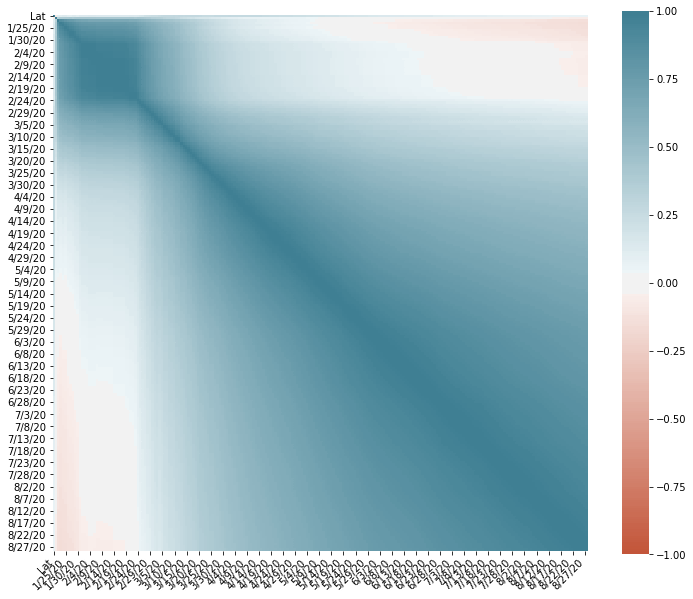

In [ ]:
corr=df_confirmed.corr(method ='kendall')
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Preprocessing 

---

> Dropping columns which are not required

> **Have a look at the datasets**

In [ ]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_covid19.head(2)

Country_Region          Last_Update  ...  Active  Incident_Rate
0    Afghanistan  2020-08-30 02:28:35  ...  7678.0      97.982598
1        Albania  2020-08-30 02:28:35  ...  3984.0     322.433804

[2 rows x 9 columns]

In [ ]:
df_confirmed.head(2)

Province/State Country/Region       Lat  ...  8/26/20  8/27/20  8/28/20
0            NaN    Afghanistan  33.93911  ...    38113    38129    38140
1            NaN        Albania  41.15330  ...     8927     9083     9195

[2 rows x 224 columns]

In [ ]:
df_deaths.head(2)

Province/State Country/Region       Lat  ...  8/26/20  8/27/20  8/28/20
0            NaN    Afghanistan  33.93911  ...     1401     1401     1402
1            NaN        Albania  41.15330  ...      263      266      271

[2 rows x 224 columns]

In [ ]:
df_table.head(2)

Country_Region Last_Update  Confirmed  ...  iso3  Report_Date_String  Delta_Deaths
0    Afghanistan  2020-01-22          0  ...   AFG          2020/01/22           0.0
1    Afghanistan  2020-01-23          0  ...   AFG          2020/01/23           0.0

[2 rows x 17 columns]

> Renaming columns to a more approprite short-hand version for simplicity

In [ ]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]

In [ ]:
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"


df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])

In [ ]:
df_table = df_table[df_table["continent"] != "Others"]
df_deaths[df_deaths["continent" ]== 'Others']

state             country continent  ...  8/26/20  8/27/20  8/28/20
34    NaN               Burma    Others  ...        6        6        6
102   NaN    Diamond Princess    Others  ...       13       13       13
139   NaN            Holy See    Others  ...        0        0        0
156   NaN              Kosovo    Others  ...      488      488      488
168   NaN          MS Zaandam    Others  ...        2        2        2
237   NaN         Timor-Leste    Others  ...        0        0        0
261   NaN  West Bank and Gaza    Others  ...      137      141      145
262   NaN      Western Sahara    Others  ...        1        1        1

[8 rows x 225 columns]

> Dropping the state column as the dataset has no valuable information

In [ ]:
df_confirmed=df_confirmed.drop(['state'],axis=1)
df_deaths=df_deaths.drop(['state'],axis=1)
# df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
# df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_deaths

country continent        Lat  ...  8/26/20  8/27/20  8/28/20
0           Afghanistan      Asia  33.939110  ...     1401     1401     1402
1               Albania    Europe  41.153300  ...      263      266      271
2               Algeria    Africa  28.033900  ...     1465     1475     1483
3               Andorra    Europe  42.506300  ...       53       53       53
4                Angola    Africa -11.202700  ...      103      105      106
..                  ...       ...        ...  ...      ...      ...      ...
261  West Bank and Gaza    Others  31.952200  ...      137      141      145
262      Western Sahara    Others  24.215500  ...        1        1        1
263               Yemen      Asia  15.552727  ...      560      562      563
264              Zambia    Africa -13.133897  ...      282      282      283
265            Zimbabwe    Africa -19.015438  ...      179      189      195

[266 rows x 224 columns]

> Filling missing values by 0

In [ ]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

df_countries_cases.fillna(0,inplace=True)
df_continents_cases.fillna(0,inplace=True)

# Analysis

> Total number of confirmed cases, deaths reported, revoveries and active cases all across the world

In [ ]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

> Reported cases : Continent-wise

In [ ]:
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

> Reported cases: Country Wise

In [ ]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

> Top 10 countries with most no. of confirmed cases

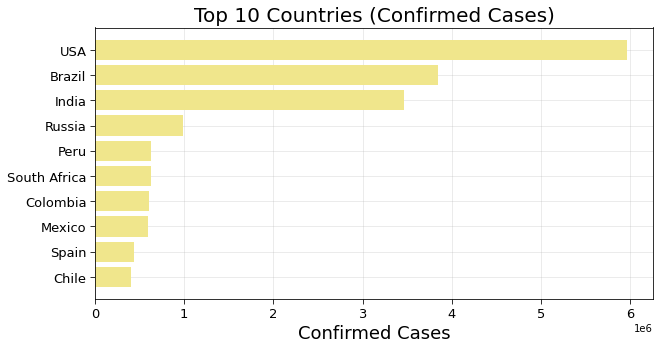

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="khaki")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

> Top 10 countries with most no. of death cases

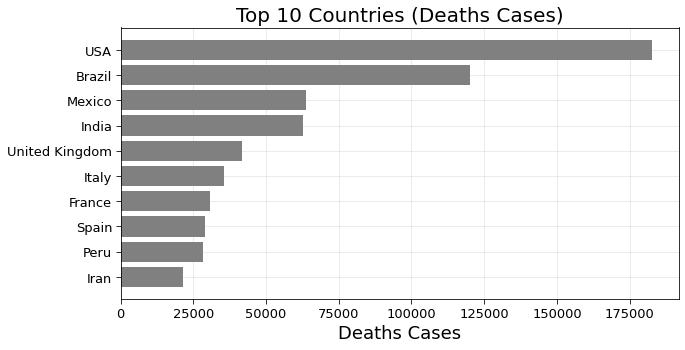

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="grey")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig('Top 10 Countries (Deaths Cases).png')

> Top 10 countries with most no. of recovered cases

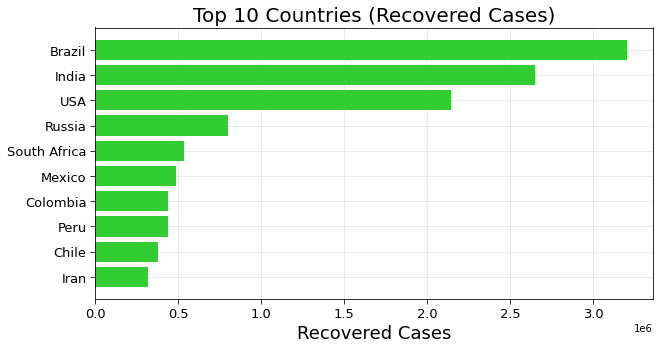

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig('Top 10 Countries (Recovered Cases).png')

>Correlation Heatmap : Country Wise



In [ ]:
df_countries_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

Correlation Heatmap : Continent Wise

In [ ]:
df_continents_cases.iloc[:,:].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

# Visualization

> World Map

In [ ]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    # "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

In [ ]:
world_map

> Spread Progression

In [ ]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country_Region", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="Country_Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

> Number of countries affected over the time

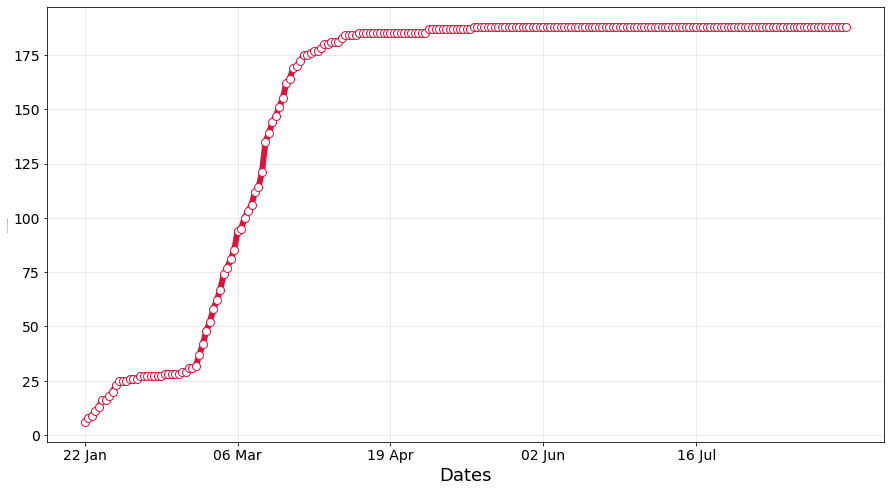

In [ ]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

plt.savefig('spread.png')
plt.show()
plt.close()

> Number of countries affected over the time

# Some Functions

In [ ]:
#@title
def plot_loss(y):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name='loss'))
  figure.show()

def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

Covid-19 Cases : No. of Confirmed & No. of Deaths - World

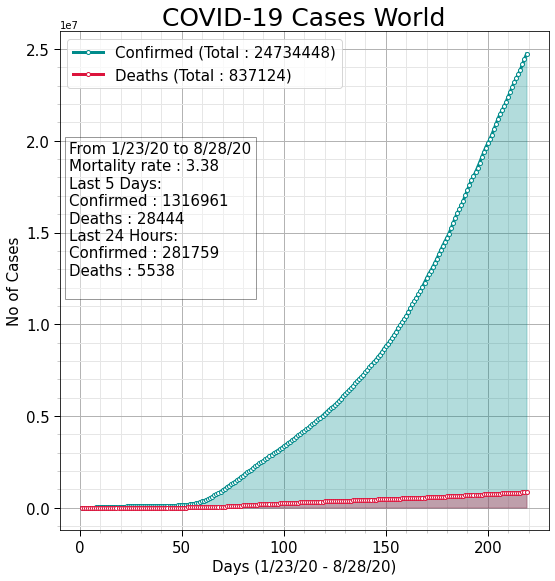

In [ ]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(df_confirmed, df_deaths,continent = "All",figure = [f,rows,cols, 1])
plt.savefig('COIVD-19-World.png')
plt.show()

> Covid-19 Cases : No. of Confirmed & No. of Deaths - Continents

In [ ]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

>  Covid-19 Cases : No. of Confirmed & No. of Deaths - Countries

In [ ]:
# df_countries = df_confirmed.groupby(["country"]).sum()
# df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
# countries = df_countries[df_countries[df_countries.columns[-1]] >= 15000].index

# cols =2
# rows = int(np.ceil(countries.shape[0]/cols))
# f = plt.figure(figsize=(18,7*rows))
# for i,country in enumerate(countries):
#     visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

# plt.show()

> Trend Projection

In [ ]:
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(20,12))
f.add_subplot(111)

threshold = 100000

t = temp_data.values
t = t[t >threshold]

date = np.arange(0,len(t[:]))
xnew = np.linspace(date.min(), date.max(), 10)
spl = make_interp_spline(date, t, k=1)  # type: BSpline
power_smooth = spl(xnew)

marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
plt.plot(date,t,"-.",label="Confirmed Cases",**marker_style)

days  = 150
# Reference lines 
x = np.arange(0,days)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =1,color = "gray")
plt.annotate("No. of Cases Doubles Every Day",(np.log2((t.max()-threshold)/threshold),t.max()-threshold/2),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days)
y = 2**(x/3+np.log2(threshold))
plt.plot(x,y,"--",linewidth =1,color = "gray")
plt.annotate("...Every Third Day",(np.log2((t.max()-threshold)/threshold)*3,(t.max()/1.2)-threshold/2),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =1,color = "gray")
plt.annotate("... Every Week",(np.log2((t.max()-threshold)/threshold)*7,t.max()-threshold),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =1,color = "gray")
plt.annotate(".. Every Month",(len(t)-25,2**((len(t)-25)/30+np.log2(threshold))),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,days)
y = 2**(x/13+np.log2(threshold))
plt.plot(x,y,"--",linewidth =1,color = "Red")
plt.annotate(".. Every 13 Days",(np.log2((t.max()-threshold)/threshold)*13,t.max()-threshold),color="Red",xycoords="data",fontsize=14,alpha = 0.8)


plt.xlim(date[0],date[-1])
plt.ylim(threshold - threshold/10,2*t.max())
# plot Params
# plt.tight_layout()
plt.tick_params(labelsize = 16)        
plt.xticks(np.arange(0,len(t[:])+10,10),[ "Day "+str(i) for i in range(len(t[:])+10)][::10]) 
plt.xlabel("Days",fontsize=19)
plt.ylabel("Number of Confirmed Cases",fontsize=19)
plt.title("World Trend",fontsize=24)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig("World Trend Confirmed cases.png")
plt.show()

> Trend Comparison : India Vs Rest

In [ ]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "India" and country != "Japan" :
            continue
    days = 61
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,days,7),[ "Day "+str(i) for i in range(days)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-22))
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-4))
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,int(days-4))
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,int(days-5))
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries\n and India (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig('Trend Comparison with India (confirmed).png')
plt.show()

> Daily New Confirmed cases : Global

In [ ]:
temp_data = np.nan_to_num(df_confirmed.sum()[5:].diff())
thousand = 1000
prediction_days = 10
# Plot
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily New Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.tick_params(labelsize = 13) 
plt.savefig("daily confirmed cases global.png")
plt.show()


> Daily New Deaths : Global

In [ ]:
# Data
temp_data = np.nan_to_num(df_deaths.sum()[5:].diff())


# Plot
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily Deaths Reported",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Deaths Reported (Thousand)",fontsize =18)

# plt.yscale("log")
plt.savefig("daily deaths cases Global.png")
plt.show()

> Pie Chart : Confirmed,Deaths,Active and Recovered cases


In [ ]:
rows = 4
f = plt.figure(figsize=(20,12*rows))

stats = [df_covid19.loc[:,['country','Confirmed']],df_covid19.loc[:,['country','Deaths']],df_covid19.loc[:,['country','Active']],df_covid19.loc[:,['country','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [50000,5000,20000,30000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.2,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()

> World Mortality Rate

In [ ]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =1
rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]),linewidth=3)

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

plt_title = "COVID-19: World Mortality Rate Curve"
plot_params(ax,axis_label,plt_title)
# Legend Location
l = plt.legend(loc= "best")


#SubPlot 2
ax = f.add_subplot(212)
for i, continent in enumerate(continents[1:]):
    mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continent)
#     mortality_rate = mortality_rate.replace(np.nan, 0, regex=True)
    plt.plot(np.arange(1+mortality_rate[mortality_rate == 0].shape[0],mortality_rate[mortality_rate == 0].shape[0]+mortality_rate[mortality_rate > 0].shape[0]+1),mortality_rate[mortality_rate > 0],label = continents[i+1]+" "+str(mortality_rate[-1]),linewidth=3)



# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])
    
plt_title = "COVID-19: Mortality Rate Curve for all Continents"
plot_params(ax,axis_label,plt_title)

# Legend Location
l = plt.legend(loc= "best")

plt.minorticks_on()
plt.savefig('Mortality rate.png')
plt.show()

> Variation of Mortality Rate

In [ ]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths','continent'].max().reset_index().fillna(0)
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter(df_data, y=100*df_data["Deaths"]/(df_data["Confirmed"]+1),
                    x= df_data["Confirmed"]+1,
                    range_y = [-1,18],
                    range_x = [1,df_data["Confirmed"].max()+10000],
                    color= "continent", hover_name="Country_Region",
                    hover_data=["Confirmed","Deaths"],
                    range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                    animation_frame="Last_Update", 
                    animation_group="Country_Region",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19: Change in Mortality Rate of Each Countries Over Time',
                    size = np.power(df_data["Confirmed"]+1,0.3)-0.5,
                    size_max = 30,
                    log_x=True,
                    height =700,
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.update_xaxes(title_text="Confirmed Cases (Log Scale)")
fig.update_yaxes(title_text="Mortality Rate (%)")
fig.show()


# Machine Learning
> Machine Learning Model Used : SupportVectorRegressor

In [ ]:
cols_conf = df_confirmed.keys()
confirmed = df_confirmed.loc[:, cols_conf[4]:cols_conf[-1]]
dates_confirmed = confirmed.keys()

days_confirmed=[]
world_cases_confirmed=[]

for i in dates_confirmed:
    confirmed_sum = confirmed[i].sum()
    world_cases_confirmed.append(confirmed_sum)

days_confirmed = np.array([i for i in range(len(dates_confirmed))]).reshape(-1, 1)
world_cases_confirmed = np.array(world_cases_confirmed).reshape(-1, 1)

#
days_in_future = 50
future_forcast_confirmed = np.array([i for i in range(len(dates_confirmed)+days_in_future)]).reshape(-1, 1)

> Holdout

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_confirmed[50:], world_cases_confirmed[50:], test_size=0.20, shuffle=False)

> RandomSearchCV for finding the optimal parameters

In [ ]:
# # used this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)
# svm_search.best_params_

In [ ]:
# svr = svm_search.best_estimator_
# print(svm_search.best_estimator_)

In [ ]:
# ## Scaling

# std = RobustScaler()

# X_test_confirmed = std.fit_transform(X_test_confirmed)
# X_train_confirmed = std.fit_transform(X_train_confirmed)
# y_train_confirmed = std.fit_transform(y_train_confirmed)
# y_test_confirmed = std.fit_transform(y_test_confirmed)


> Model Training

In [ ]:
svm = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm.predict(future_forcast_confirmed)
svm_test_pred = svm.predict(X_test_confirmed)

> Model Evaluation

In [ ]:
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
print('R2_Score:',r2_score(svm_test_pred, y_test_confirmed))

In [ ]:
plt.title('Confirmed Cases - SVR')
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])

>  Machine Learning Model Used : Polynomial Regression


In [ ]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed) 
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast_confirmed)

# bayesian_poly = PolynomialFeatures(degree=4)
# bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
# bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
# bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast_confirmed)

> Model Training

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

> Model Evaluation

In [ ]:
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
print(linear_model.coef_)
print('R2_Score:',r2_score(test_linear_pred, y_test_confirmed)) 

plt.plot(y_test_confirmed)
plt.title('Confirmed Cases - Polynomial Regression')
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.show()

# Deep Learning

Framework Used : Keras

> Building Model : Confirmed Cases


In [ ]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(128,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(128,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(128,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4
                                     )
model = models.Model(inputs=Visible, outputs=LRelu_l4)
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()

Processing data for fitting : Confirmed Cases

In [ ]:
data_y = np.log10(np.asarray(df_confirmed.iloc[:,5:].sum(axis =0)).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

Fitting

In [ ]:
epochs = 10000
history = model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs=epochs)


In [ ]:
plot_loss(history.history['loss'])

Model Loss | Epochs

In [ ]:
model.save('my_model_confirmed.h5')

In [ ]:
model = models.load_model("my_model_confirmed.h5")
model.summary()

> Prediction : Next 10 days - Confirmed Cases

In [ ]:
#@title
lakh = 100000
prediction_days = 10

temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
data = np.power(10,model.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig("Prediction Curve-Confirmed.png")
plt.show()

> Building Model : Death Cases

In [ ]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(128,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Drop1 = Dropout(0.4)(LRelu_l1)

Dense_l2 = Dense(128,name = "Dense_l2")(Drop1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Drop2 = Dropout(0.25)(LRelu_l2)

Dense_l3 = Dense(128,name = "Dense_l3")(Drop2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)
Drop3 = Dropout(0.15)(LRelu_l3)

Dense_l4 = Dense(1,name="Dense_l4")(Drop3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4)

model2 = models.Model(inputs=Visible, outputs=LRelu_l4)
model2.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error')
model2.summary()

> Processing data for fitting : Deaths Cases

In [ ]:
data1_y = np.log10(np.asarray(df_deaths.iloc[:,5:].sum(axis =0)).astype("float32"))
data1_x = np.arange(1,len(data1_y)+1)

> Fitting

In [ ]:
epochs= 500
history2 = model2.fit(data1_x.reshape([data1_y.shape[0],1]),data1_y.reshape([data1_y.shape[0],1]),epochs=epochs)

> Model Loss | Epochs

In [ ]:
plot_loss(history2.history['loss'])

In [ ]:
model2.save('my_model_deaths.h5')

In [ ]:
model2 = models.load_model("my_model_deaths.h5")
# model2 = models.load_model("model_deaths_v5.h5")
model2.summary()

> Prediction : Next 10 days - Death Cases

In [ ]:
thousand = 1000
prediction_days = 10

temp_data = df_deaths.iloc[:,5:].sum(axis =0)
data = np.power(10,model2.predict(np.arange(1,len(temp_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))
# xnew = np.linspace(date.min(), date.max(), 10)
# spl = make_interp_spline(date, t, k=1)  # type: BSpline
# power_smooth = spl(xnew)

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/thousand,"-.",color="maroon",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/thousand,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-1)[0]/thousand)+"K\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Deaths Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Deaths Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig("Prediction Curve2.png")
plt.show()


# CoVID-19 : USA

In [ ]:
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime("%m-%d-%Y")
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date_usa+".csv")
df_usa = df_temp.loc[df_temp["Country_Region"]== "US"]
df_usa = df_usa.rename(columns={"Admin2":"County"})

> Confirmed Cases & Deaths : USA

In [ ]:
total = df_usa.sum()
total.name = "Total"
pd.DataFrame(total).transpose().loc[:,["Confirmed","Deaths"]].style.background_gradient(cmap='Blues',axis=1)

> Confirmed Cases & Deaths : USA Statewise

In [ ]:
df_usa.loc[:,["Confirmed","Deaths","Province_State"]].groupby(["Province_State"]).sum().sort_values("Confirmed",ascending=False).style.background_gradient(cmap='Blues',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"])

> Top 10 States with most Confirmed cases and deaths

In [ ]:
df_usa.loc[:,["Province_State","Confirmed","Deaths","County"]].sort_values("Confirmed",ascending=False).set_index("County")[:10].style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])

USA - Top 10 states Confirmed cases

In [ ]:
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_USA (Confirmed Cases).png')

USA - Top 10 states Fatal cases

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: USA (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_USA (Deaths Cases).png')

Covid-19 : USA Map

In [ ]:
df_usa = df_usa.replace(np.nan, 0, regex=True)
usa = folium.Map(location=[37, -102], zoom_start=4,max_zoom=9,min_zoom=4)
for i in np.int32(np.asarray(df_usa[df_usa['Confirmed'] > 0].index)):
    folium.Circle(
        location=[df_usa.loc[i]['Lat'], df_usa.loc[i]['Long_']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_usa.loc[i]['Province_State']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_usa.loc[i]['County']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_usa.loc[i]['Confirmed'])+"</li>"+
        "<li>Active:   "+str(df_usa.loc[i]['Active'])+"</li>"+
        "<li>Recovered:   "+str(df_usa.loc[i]['Recovered'])+"</li>"+       
        "<li>Deaths:   "+str(df_usa.loc[i]['Deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_usa.loc[i]['Deaths']/(df_usa.loc[i]['Confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=int((np.log2(df_usa.loc[i]['Confirmed']+1))*6000),
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(usa)

In [ ]:
usa

> Next week's prediction for confirmed cases : USA

In [ ]:
# Deep learning model

Visible = Input(shape=(1,))
Dense_l1 = Dense(128,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(128,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model_usa_c = models.Model(inputs=Visible, outputs=LRelu_l3)
model_usa_c.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              )
model_usa_c.summary()

In [ ]:
model_usa_c.save('my_model_usa.h5')

In [ ]:
# preparing data for fitting 
df_temp = df_confirmed.groupby(["country"]).sum()
df_temp = np.asarray(df_temp[df_temp.index == "USA"].iloc[:,2:])[0]
data_y = np.log10(df_temp).astype("float32")
data_x = np.arange(1,len(data_y)+1)

In [ ]:
model_usa_c = models.load_model("my_model_usa.h5")
model_usa_c.summary()

In [ ]:
epochs = 5000
history_usa=model_usa_c.fit(data_x.reshape([data_x.shape[0],1]),data_y.reshape([data_x.shape[0],1]),epochs=epochs,batch_size=64)

> Model Loss | Epochs

In [ ]:
plot_loss(history_usa.history['loss'])

In [ ]:
lakh = 100000
prediction_days = 7
df_temp = df_confirmed.groupby(["country"]).sum()
temp_data = np.asarray(df_temp[df_temp.index == "USA"].iloc[:,2:])[0]
data = np.power(10,model_usa_c.predict(np.arange(1,len(temp_data)+prediction_days+1)))
# temp_data = df_confirmed.iloc[:,5:].sum(axis =0)

f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 7 day Prediction Curve-USA Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig("Prediction Curve-Confirmed (USA).png")
plt.show()

# Conclusion

Everyone wants to turn the page on SARS-CoV-2 or COVID-19 as soon as possible. But lessons are inevitable. And it's up to each of us to decide if those lessons are right.  

Throughout mankind's long history, there have been many such cases but no one expected something like this to happen in the 21st century.

We have to stay strong and stay indoors as much as possible for our own sake and continue to act from a moral perspective. After all, our best bet is a happy future for all who live on Earth, our common home. 


Submitted By: Sanuj Kumar
<br>
sanujsriv@gmail.com
<br><br>
Have a good one!